<a href="https://colab.research.google.com/github/Arcus0800/repo1/blob/main/numModelTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import torch
import random
import torchvision
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
#hyperparameters
batch_size = 128
learning_rate = 0.001

input_size = 28*28
num_classes = 10
epoch = 10

In [15]:
class imgmodel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(input_size, num_classes)

  def forward(self, x):
    x = x.reshape(-1, 28*28)
    x = self.linear(x)
    return x

  def training_step(self, batch):
    image, label = batch
    pred = self(image)
    loss = F.cross_entropy(pred, label)
    return loss

  def validation_step(self, batch):
    image, label = batch
    pred = self(image)
    loss = F.cross_entropy(pred, label)
    acc = accuracy(pred, label)
    return {'val_loss': loss.detach(), 'val_acc': acc.detach()}

  def validation_epoch_end(self, outputs):
    batch_losses = [x['val_loss'] for x in outputs]
    epoch_loss = torch.stack(batch_losses).mean()
    batch_acc = [x['val_acc'] for x in outputs]
    epoch_acc = torch.stack(batch_acc).mean()
    return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

  def epoch_end(self, epoch, result):
    print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

# Create the model instance
model = imgmodel()

# Load the state dictionary
model.load_state_dict(torch.load('imgmodel.pth'))
model.eval()  # Set the model to evaluation mode

print("Model loaded from imgmodel.pth")

dataset = MNIST(root='data/', train = True, download=True, transform=transforms.ToTensor())
test_ds = MNIST(root='data/', train=False, transform=transforms.ToTensor())

def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)
    return preds[0].item()

Model loaded from imgmodel.pth


Label: 3 , Predicted: 3


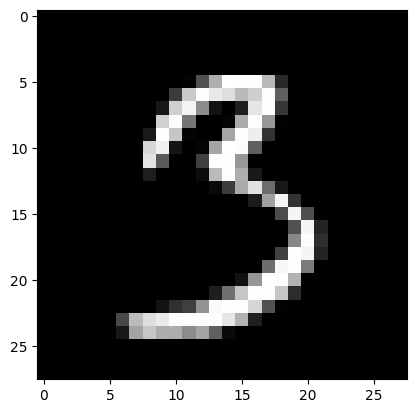

In [21]:
img, label = test_ds[random.randint(0,9999)]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))